In [1]:
#Importing important libraries
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import utils as np_utils

In [2]:
#Setting up hyper-parameters
num_classes = 10
batch_size = 128
epochs = 150

In [3]:
# Resolving the image and loading the data
img_rows, img_cols = 28, 28
# Loading the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Preparaing the data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Creating the Model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [6]:
# Training the Model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/150
469/469 [==============================] - 21s 18ms/step - loss: 2.2885 - accuracy: 0.1403 - val_loss: 2.2653 - val_accuracy: 0.2363
Epoch 2/150
469/469 [==============================] - 8s 16ms/step - loss: 2.2503 - accuracy: 0.2302 - val_loss: 2.2192 - val_accuracy: 0.4472
Epoch 3/150
469/469 [==============================] - 7s 16ms/step - loss: 2.2000 - accuracy: 0.3338 - val_loss: 2.1549 - val_accuracy: 0.5715
Epoch 4/150
469/469 [==============================] - 8s 16ms/step - loss: 2.1304 - accuracy: 0.4151 - val_loss: 2.0632 - val_accuracy: 0.6572
Epoch 5/150
469/469 [==============================] - 7s 16ms/step - loss: 2.0315 - accuracy: 0.4859 - val_loss: 1.9352 - val_accuracy: 0.7045
Epoch 6/150
469/469 [==============================] - 7s 16ms/step - loss: 1.8966 - accuracy: 0.5403 - val_loss: 1.7635 - val_accuracy: 0.7362
Epoch 7/150
469/469 [==============================] - 8s 17ms/step - loss: 1.7291 - accuracy: 0.5817 - val_loss: 1.5540 - val_accuracy

In [7]:
# Evaluating the Predictions on the Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1555253565311432
Test accuracy: 0.9538999795913696


In [8]:
# Saving the model for Future Inferences
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("mnist.h5")

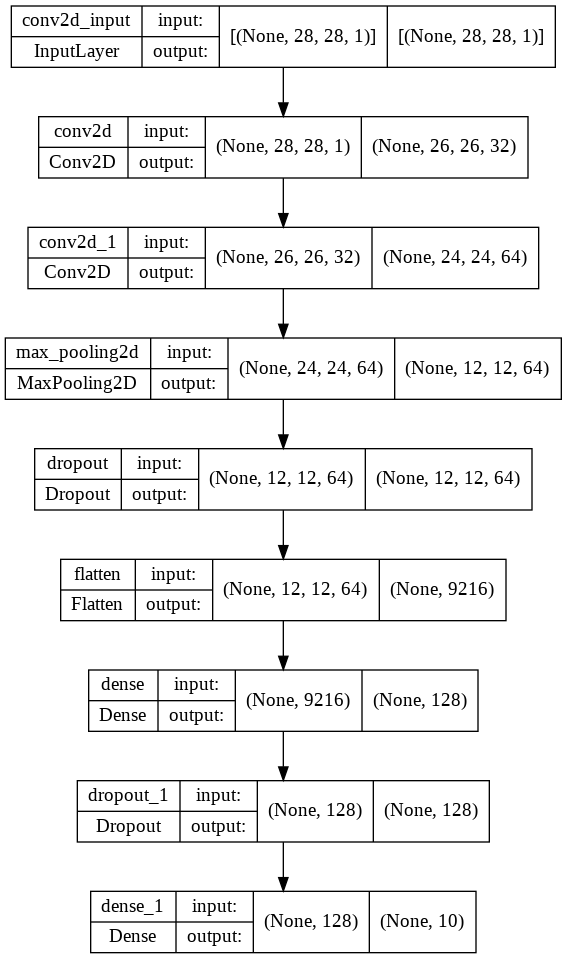

In [9]:
# Generating a picture of the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)